## Импортирование зависимостей

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as sts
import numpy as np
import datetime as dt

C:\Users\damir\AppData\Local\Temp\ipykernel_13848\1197761999.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Конфигурация графиков

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['font.size'] = 14

## Загрузка и просмотр датасета 

In [3]:
path: str = r'Walmart.csv'
data = pd.read_csv(path)

In [4]:
data['CPI_round'] = data['CPI'].round().astype(int)

In [5]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,CPI_round
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,211
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,211
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,211
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,211
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,211


In [6]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,CPI_round
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,192
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,192
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,192
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,192
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667,192


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
 8   CPI_round     6435 non-null   int32  
dtypes: float64(5), int32(1), int64(2), object(1)
memory usage: 427.4+ KB


In [8]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,CPI_round
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,171.583994
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,39.351305
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,126.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,132.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,183.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,213.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,227.000000


##  Рассмотрим статистические значения

In [25]:
def statsistics(sales: np.array, weeks: np.array, cd: str) -> None:
    a = .05
    variance = False
    first_sale = sales[0]
    other_sales = sales[1:]
    for i, other_sale in enumerate(other_sales):
        _, p_value = sts.mannwhitneyu(other_sale, first_sale)
    if p_value < a:
        print(f'{weeks[i]}: Произошло отклонение')
        variance = True
    if not variance:
        print(f'Отклонений не произошло')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=72))
    if cd == 'c':
        plt.plot(weeks[1:], other_sales)
    elif cd == 'd':
        plt.scatter(weeks[1:], other_sales)
    else:
        print('Wrong input')
    plt.hlines(first_sale, weeks[0], weeks[-1], color='green')
    plt.gcf().autofmt_xdate()
    plt.show()

1) Сравним недельные продажи в 2 магазинах с индексами 1 и 45(в каждом из магазинов первый день с остальными) 

In [26]:
sales_1 = data[data['Store'] == 1][['Weekly_Sales']].values
sales_45 = data[data['Store'] == 45][['Weekly_Sales']].values
weeks = pd.to_datetime(data[data['Store'] == 1]['Date'], format='%d-%m-%Y').dt.date.values

Отклонений не произошло


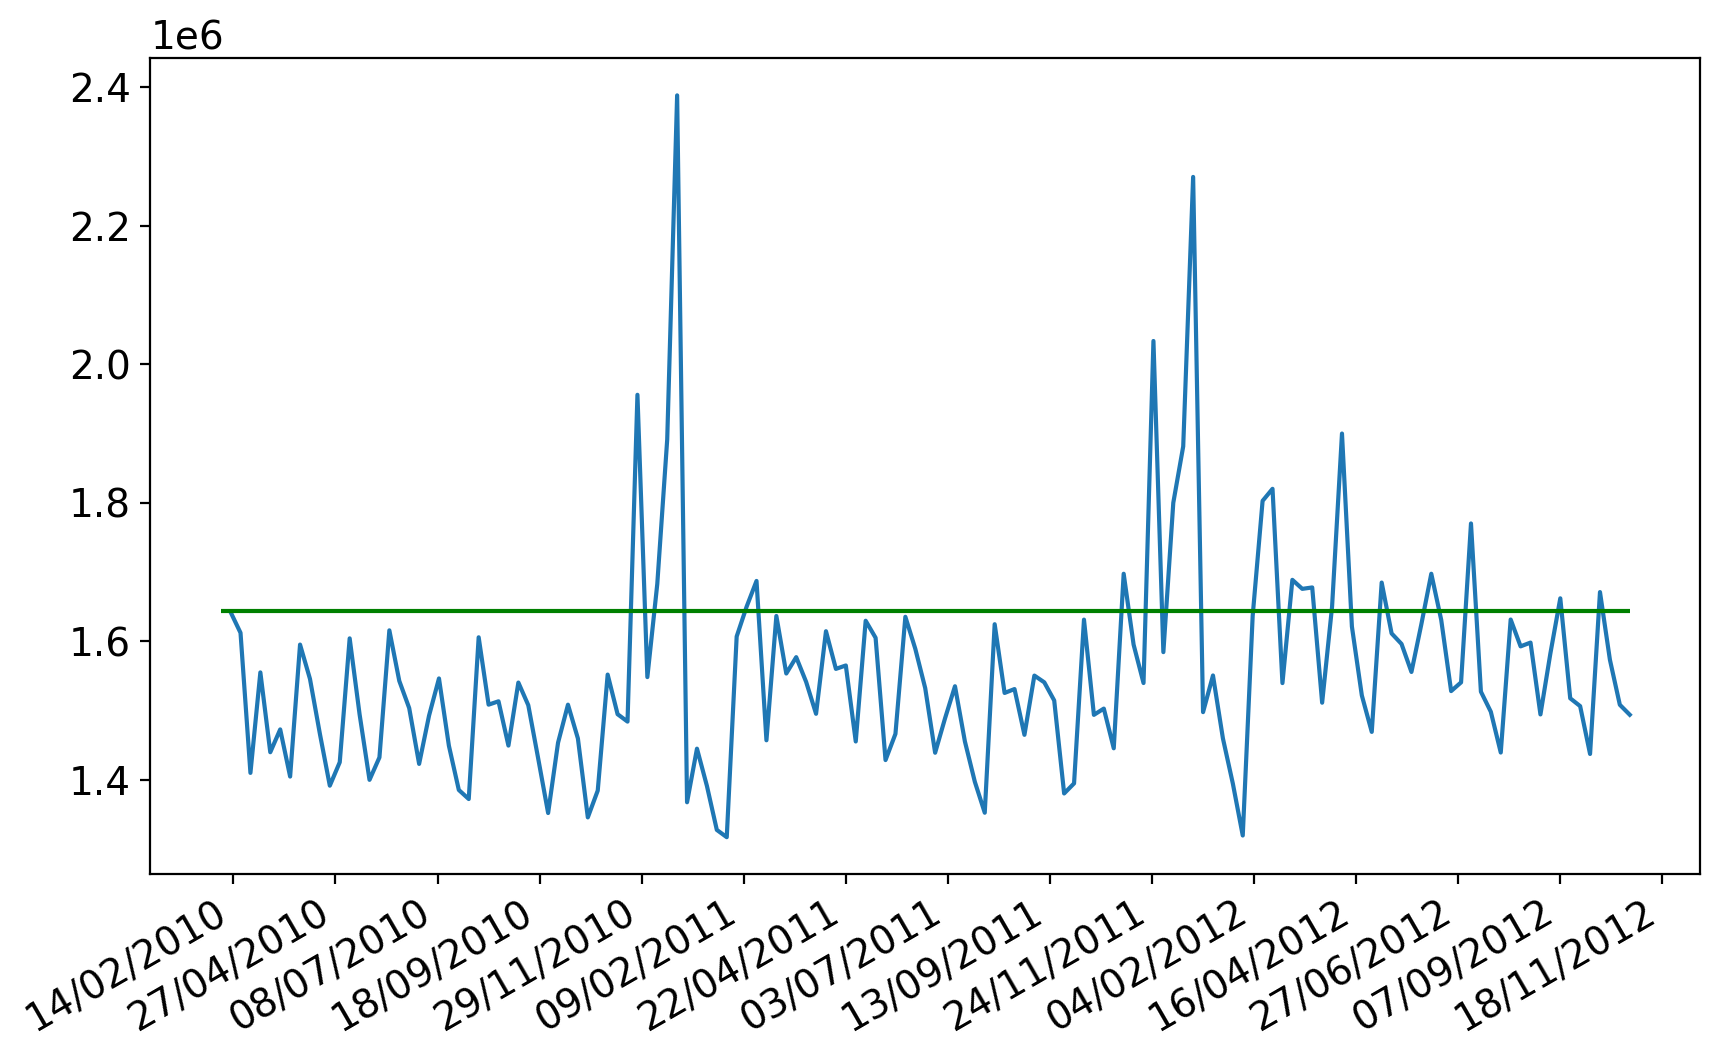

In [27]:
statsistics(sales_1, weeks, 'c')

Отклонений не произошло


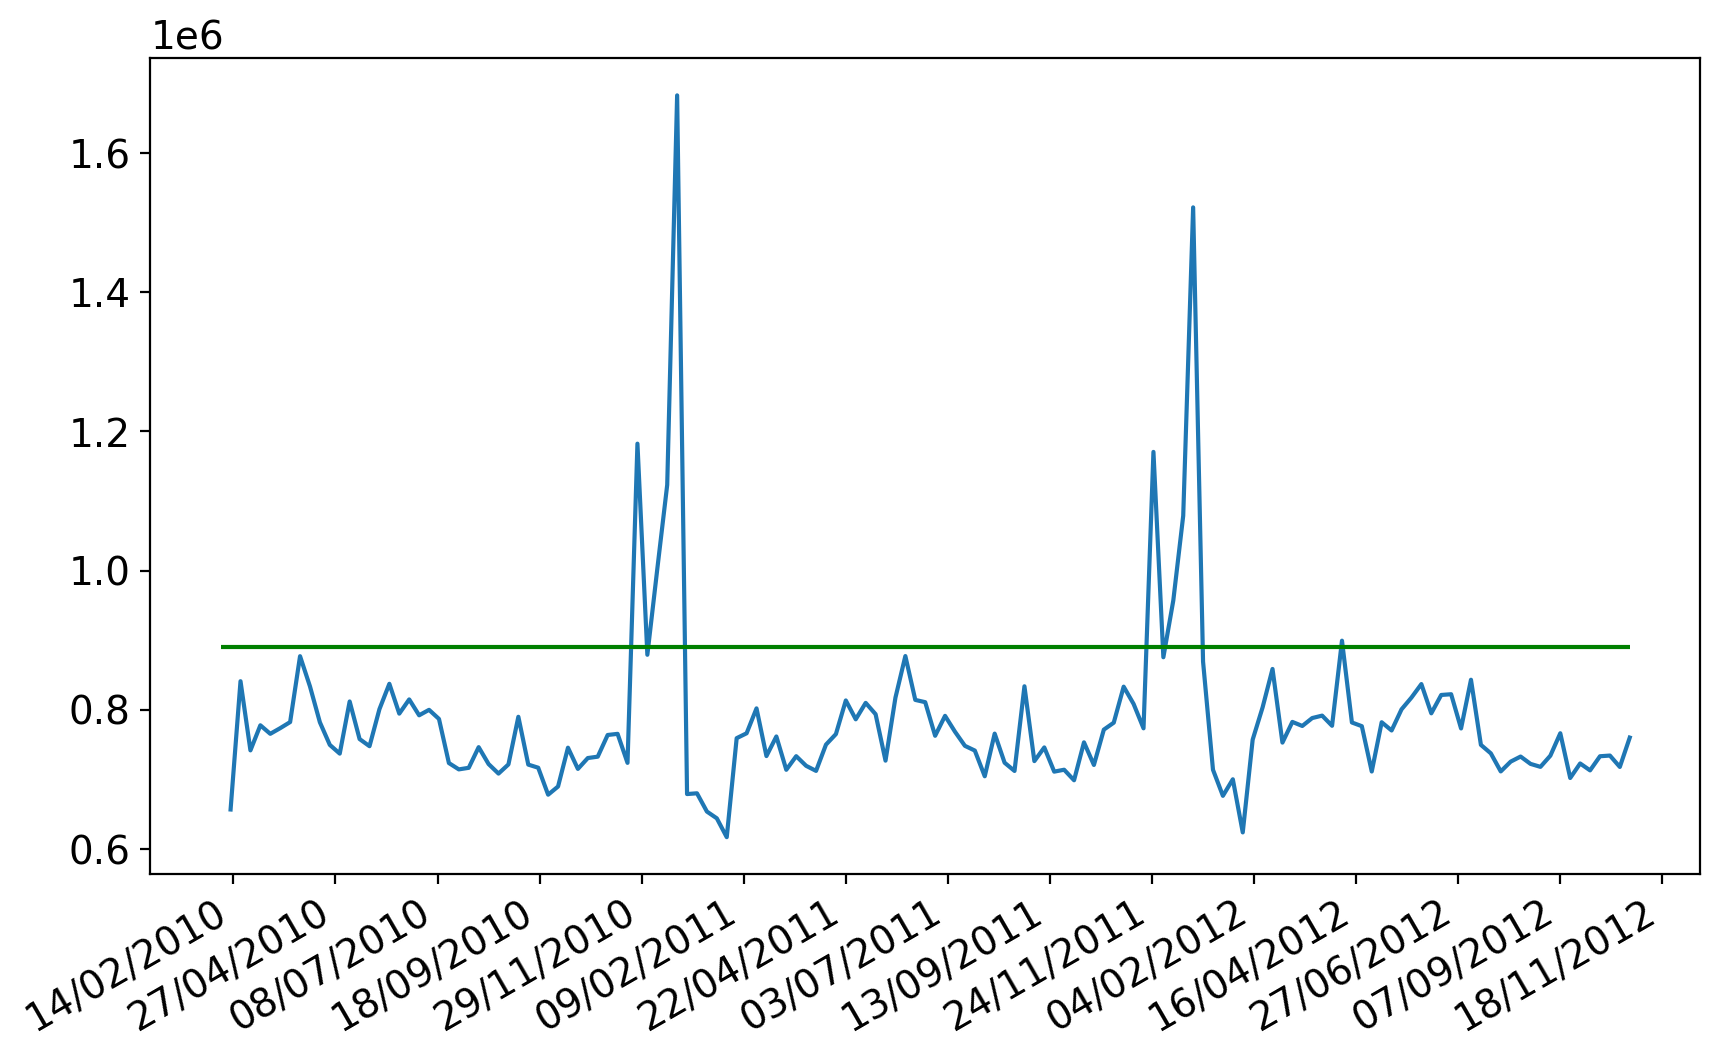

In [28]:
statsistics(sales_45, weeks, 'c')

На графиках видна общая сохраняющаяся тенденция между магазинами, заключающаяся в расположении данных в основном под линий(в первый день продаж больше, чем в дни под линией), а также присутствуют выбросы

2) Сравним CPI в 2 магазинах с индексами 1 и 45(в каждом из магазинов первый день с остальными) 

In [29]:
cpi_1 = data[data['Store'] == 1][['CPI_round']].values
cpi_45 = data[data['Store'] == 45][['CPI_round']].values

Отклонений не произошло


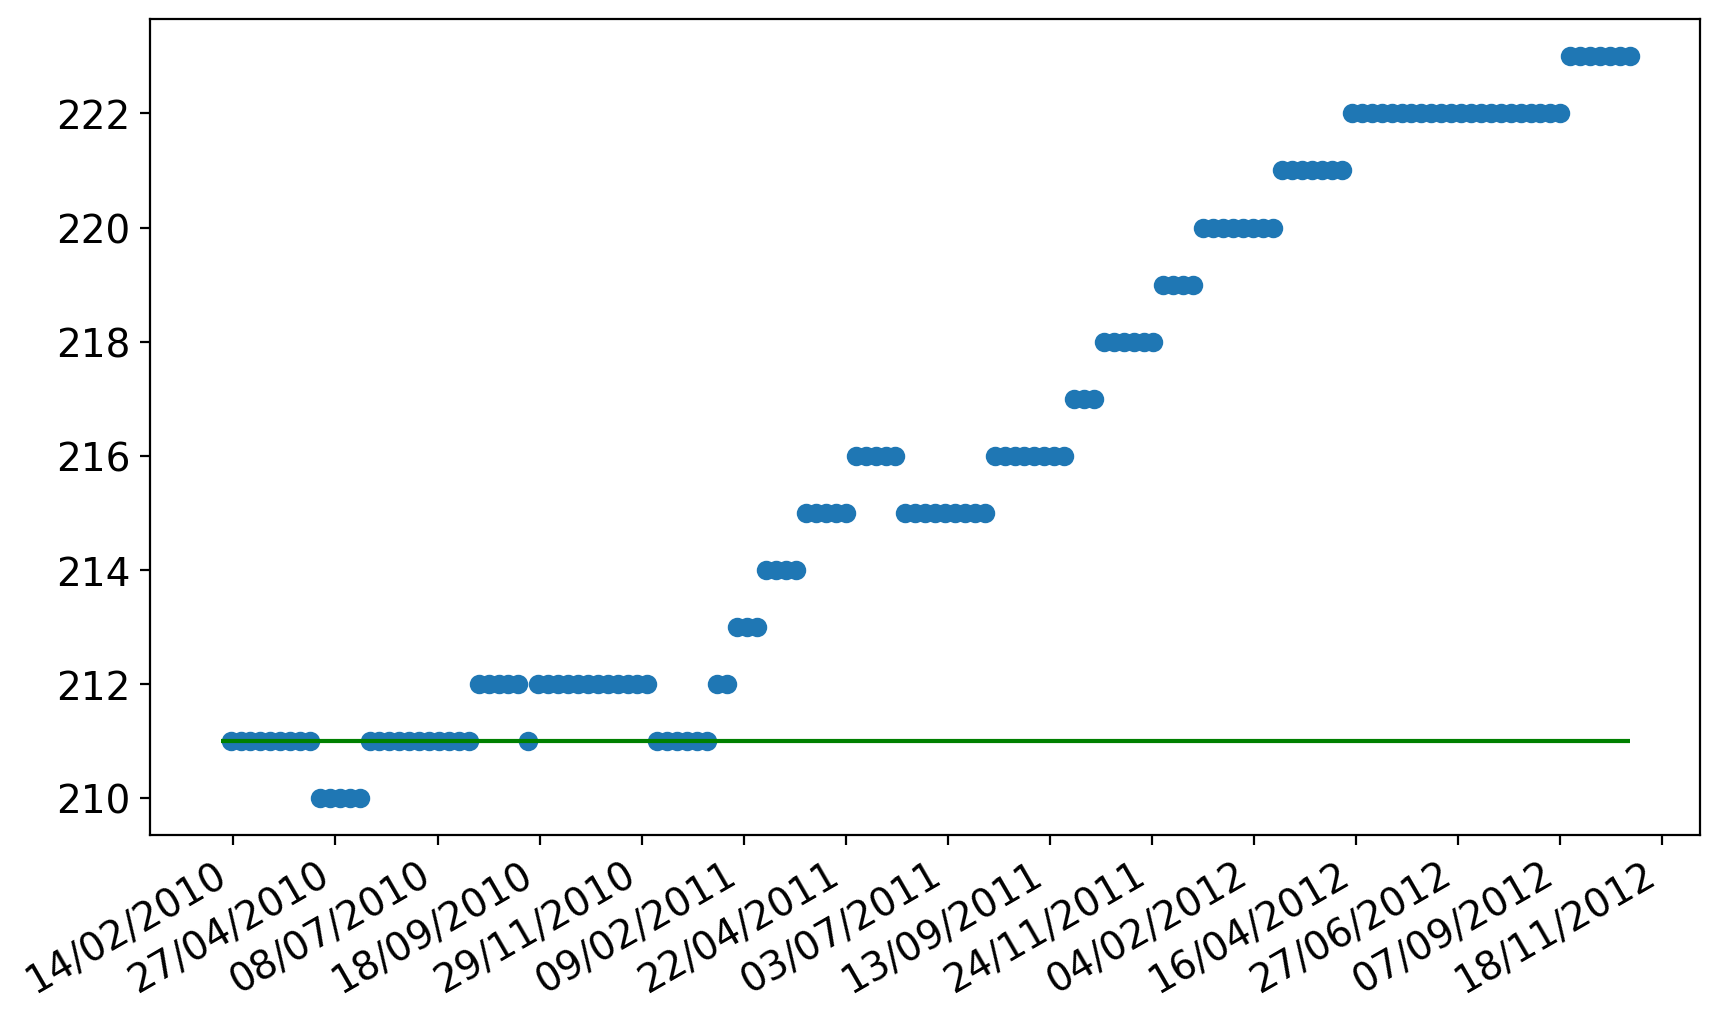

In [30]:
statsistics(cpi_1, weeks, 'd')

Отклонений не произошло


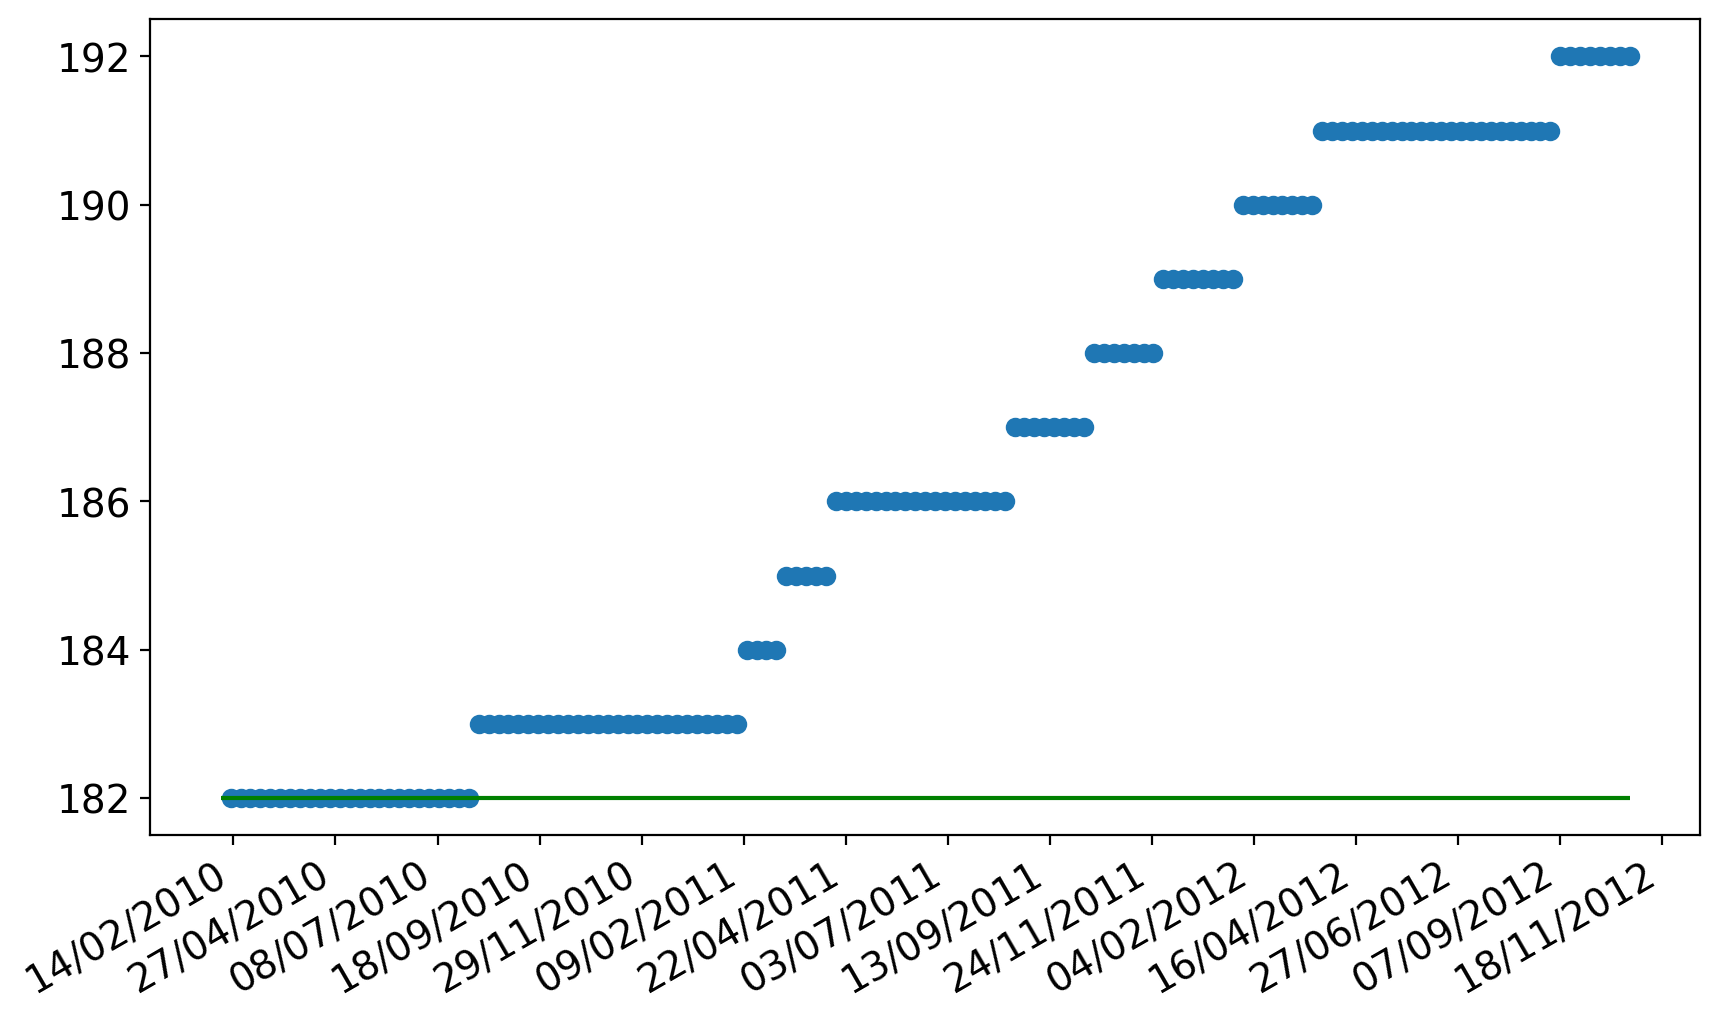

In [31]:
statsistics(cpi_45, weeks, 'd')

Заметная общая монотонная тенденция в росте показателей в магазинах